# **Potato Disease Classification**

**👨‍💻Author: Muhammad Hassaan**

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/iammuhammadhassaaan) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)

**Problem Statement:**

Potatoes play a crucial role in feeding the world, but they’re often threatened by diseases like early blight and late blight, which can lead to major crop losses. Identifying these diseases the traditional way can be time-consuming and inefficient. By using machine learning to automatically classify potato leaf diseases, we can detect problems early and manage them more effectively, helping to protect harvests and support food security.

**Objective:**

Develop a deep learning model that accurately classifies potato leaf images into three categories:

1. **Healthy**
2. **Early Blight**
3. **Late Blight**

This model will assist farmers and agricultural professionals in promptly identifying and addressing potato diseases.

**Dataset:**

The project will utilize the PlantVillage dataset, specifically focusing on potato leaf images. The dataset includes images categorized as:

- **Potato___Early_blight**
- **Potato___Late_blight**
- **Potato___healthy**

These images are standardized to 256x256 pixels and are available in color. The dataset is publicly accessible on Kaggle. 

**Metadata:**

- **Dataset Name:** PlantVillage Dataset
- **Total Images:** Approximately 54,303 (subset for potato leaves)
- **Number of Classes:** 3 (specific to potato leaves)
- **Image Format:** JPEG
- **Image Size:** 256x256 pixels
- **Source:** PlantVillage Dataset on Kaggle
- **License:** CC0 1.0 Universal (CC0 1.0) Public Domain Dedication

**References:**

- [PlantVillage Dataset on Kaggle](https://www.kaggle.com/datasets/arjuntejaswi/plant-village/data)

---

- Healthy Leaves:
  
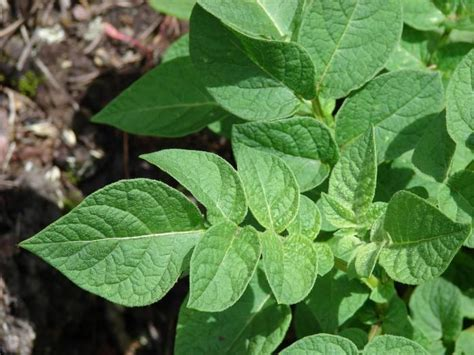

- Early Blight Leaves: 

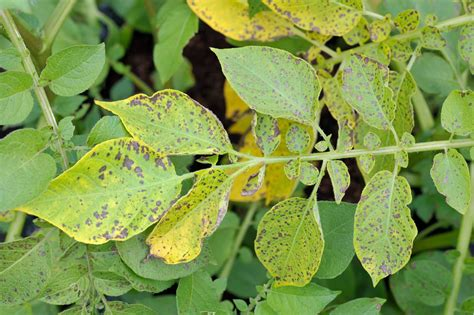


- Late Blight Leaves:
  
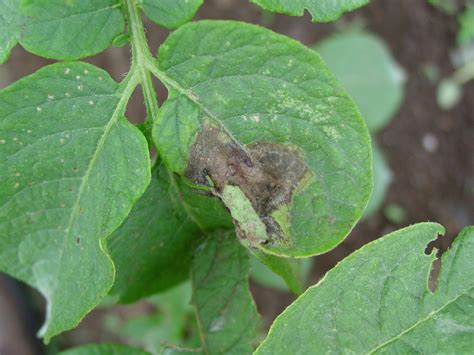

---

### Importing Libraries

In [76]:
# core libraries 
import os 
import pandas as pd 
import numpy as np

# image processing libraries
from PIL import Image
import cv2

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# warnings 
import warnings
warnings.filterwarnings('ignore')

### Loading Datasets

In [77]:
# set dataset directory 
dataset_dir = '../data'

# Define classes
classes = ["Potato___Healthy", "Potato___Early_blight", "Potato___Late_blight"]

# set image size for resizing
img_size = (256, 256)

# initialize data and labels
data = []
labels = []

In [78]:
# load images with thiers corresponsing labels 
for class_idx, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_dir, class_name)

    if not os.path.exists(class_dir):
        print(f"Directory {class_dir} does not exist")
        continue

    print(f"Loading images from {class_dir}")


    for img_name in os.listdir(os.path.join(dataset_dir, class_name)):
        image_path = os.path.join(dataset_dir, class_name, img_name)
        
        try:
            img = load_img(image_path, target_size=img_size)
            img_array = img_to_array(img)
            data.append(img_array)
            labels.append(class_idx)
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")

# convert data and labels to numpy arrays
data = np.array(data, dtype='float32') / 255.0
labels = np.array(labels)

print(f"Loaded {len(data)} images with {len(labels)} labels.")

Loading images from ../data\Potato___Healthy
Loading images from ../data\Potato___Early_blight
Loading images from ../data\Potato___Late_blight
Loaded 2152 images with 2152 labels.


### Data Exploration

In [79]:
# count images in each class 
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)

    if os.path.exists(class_dir):
        num_images = len(os.listdir(class_dir))
        print(f"{class_name}: {num_images} images")
    else:
        print(f"Directory not found: {class_dir}")

Potato___Healthy: 152 images
Potato___Early_blight: 1000 images
Potato___Late_blight: 1000 images


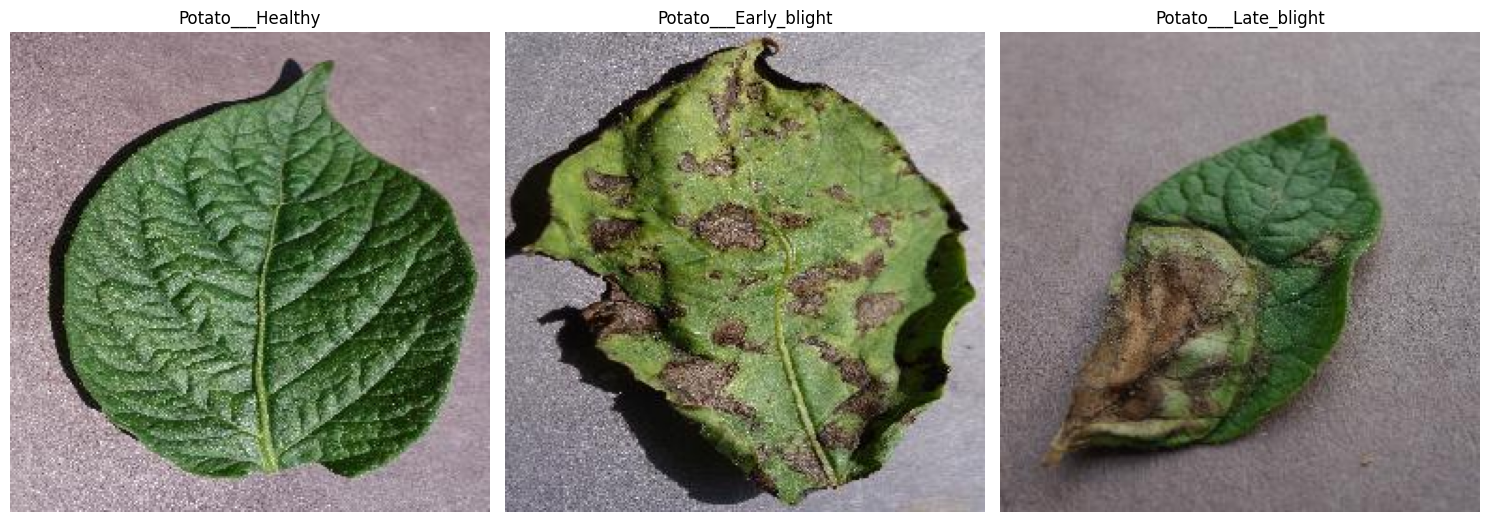

In [80]:
# define a function to display sample images from each class 
def display_sample_images(dataset_dir, classes, image_size=(256, 256)):
    plt.figure(figsize=(15, 15))

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        
        if os.path.exists(class_dir):
            img_name = os.listdir(class_dir)[0]
            img_path = os.path.join(class_dir, img_name)
            img = load_img(img_path, target_size=image_size)
            plt.subplot(1, 3, i+1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# display sample images from each class
display_sample_images(dataset_dir, classes)

### Data Augmentation

In [81]:
# define the data augementation parameters 
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [82]:
# load a sample image
sample_image_path = ("../data/Potato___Early_blight/0a8a68ee-f587-4dea-beec-79d02e7d3fa4___RS_Early.B 8461.JPG")
sample_img = load_img(sample_image_path, target_size=(256, 256))  # Resize to 256x256
sample_array = img_to_array(sample_img)  # Convert to array
sample_array = sample_array.reshape((1,) + sample_array.shape)

In [83]:
# generate augmented images
augmented_images = data_augmentation.flow(sample_array, batch_size=1)

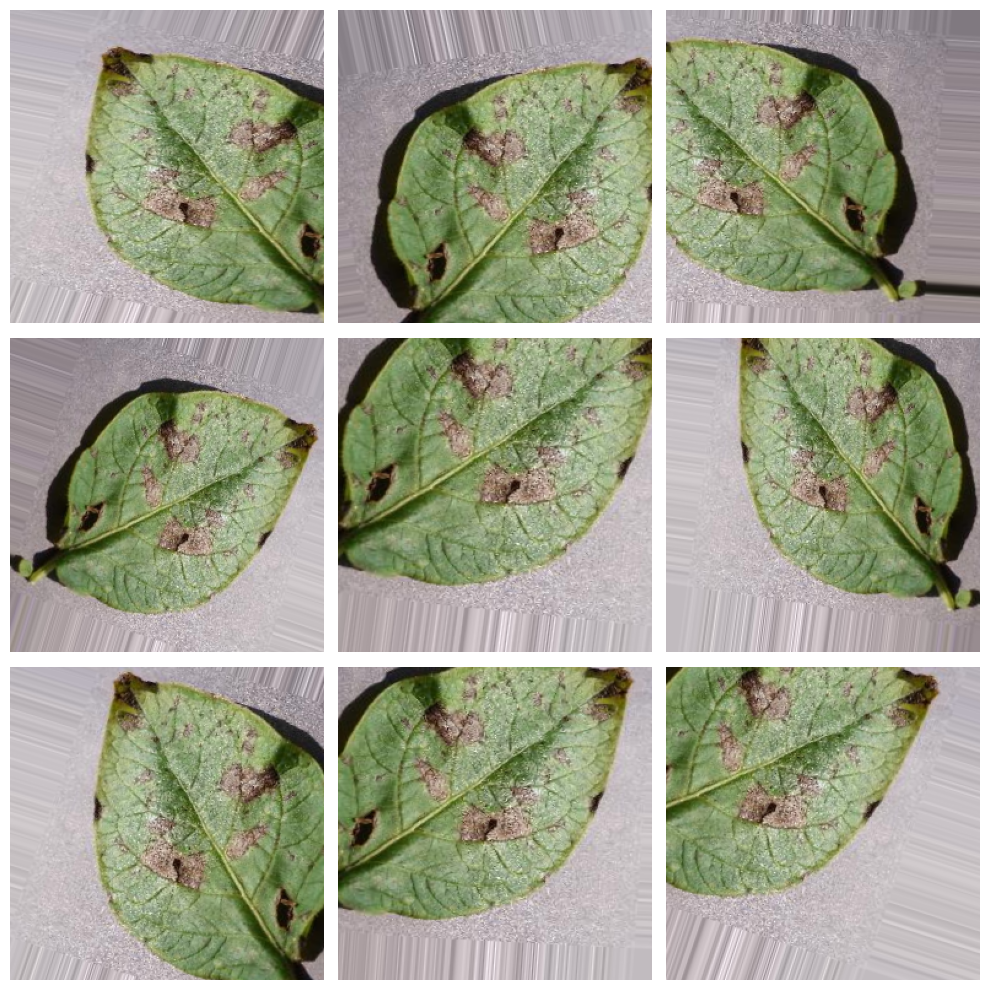

In [84]:
# visulize the augemented images
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = next(augmented_images)[0].astype('uint8')
    plt.subplot(3, 3, i + 1)
    plt.imshow(array_to_img(augmented_image))
    plt.axis("off")

plt.tight_layout()
plt.show()

In [85]:
#  Split the dataset into train, validation, and test sets
X_train, X_remaining, y_train, y_remaining = train_test_split(
    data, labels, 
    test_size=0.3, 
    random_state=42, 
    stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_remaining, y_remaining, 
    test_size=0.5,  # 15% for validation, 15% for testing
    random_state=42, 
    stratify=y_remaining
)

# Define the data augmentation pipeline for training data
data_augmentation = ImageDataGenerator(
    rotation_range=30,       # Rotation from 0 to 30 degrees
    width_shift_range=0.2,   # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Zoom in/out
    horizontal_flip=True,    # Random horizontal flip
    fill_mode="nearest"      # Filling missing pixels after transformations
)

# Train the model using the augmented data
train_generator = data_augmentation.flow(X_train, y_train, batch_size=32)
val_generator = ImageDataGenerator().flow(X_val, y_val, batch_size=32)  # No augmentation for validation
test_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=32)  # No augmentation for testing

In [86]:
# Build the deeper CNN model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling layer to down-sample the image

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling layer to down-sample the image

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling layer to down-sample the image

    # Fourth Convolutional Layer
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling layer to down-sample the image

    # Fifth Convolutional Layer
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling layer to down-sample the image

    # Flatten the output to feed into fully connected layers
    Flatten(),

    # Fully Connected Layer
    Dense(256, activation='relu'),  # Increased number of neurons
    Dropout(0.5),  # Dropout to prevent overfitting

    # Output Layer (3 classes: Healthy, Early Blight, Late Blight)
    Dense(3, activation='softmax')  # 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 128)     

In [89]:
# Train the model using augmented data and validation data
history = model.fit(
    train_generator,  # Augmented training data
    validation_data=val_generator,  # Validation data
    epochs=20,  # Number of epochs to train the model
    steps_per_epoch=len(X_train) // 32,  # Number of batches per epoch (based on batch size)
    validation_steps=len(X_val) // 32,  # Number of validation batches per epoch
    verbose=1  # Print progress during training
)

Epoch 1/20
47/47 [==============================] - 19s 386ms/step - loss: 0.8751 - accuracy: 0.5156 - val_loss: 0.6641 - val_accuracy: 0.6844
Epoch 2/20
47/47 [==============================] - 18s 389ms/step - loss: 0.6659 - accuracy: 0.7117 - val_loss: 0.5331 - val_accuracy: 0.7875
Epoch 3/20
47/47 [==============================] - 22s 468ms/step - loss: 0.9237 - accuracy: 0.5712 - val_loss: 0.6762 - val_accuracy: 0.6875
Epoch 4/20
47/47 [==============================] - 22s 470ms/step - loss: 0.5235 - accuracy: 0.7938 - val_loss: 0.7291 - val_accuracy: 0.7000
Epoch 5/20
47/47 [==============================] - 19s 410ms/step - loss: 0.3784 - accuracy: 0.8467 - val_loss: 0.6770 - val_accuracy: 0.7000
Epoch 6/20
47/47 [==============================] - 19s 399ms/step - loss: 0.3568 - accuracy: 0.8657 - val_loss: 0.4459 - val_accuracy: 0.8094
Epoch 7/20
47/47 [==============================] - 20s 410ms/step - loss: 0.2539 - accuracy: 0.9023 - val_loss: 0.3630 - val_accuracy: 0.8375

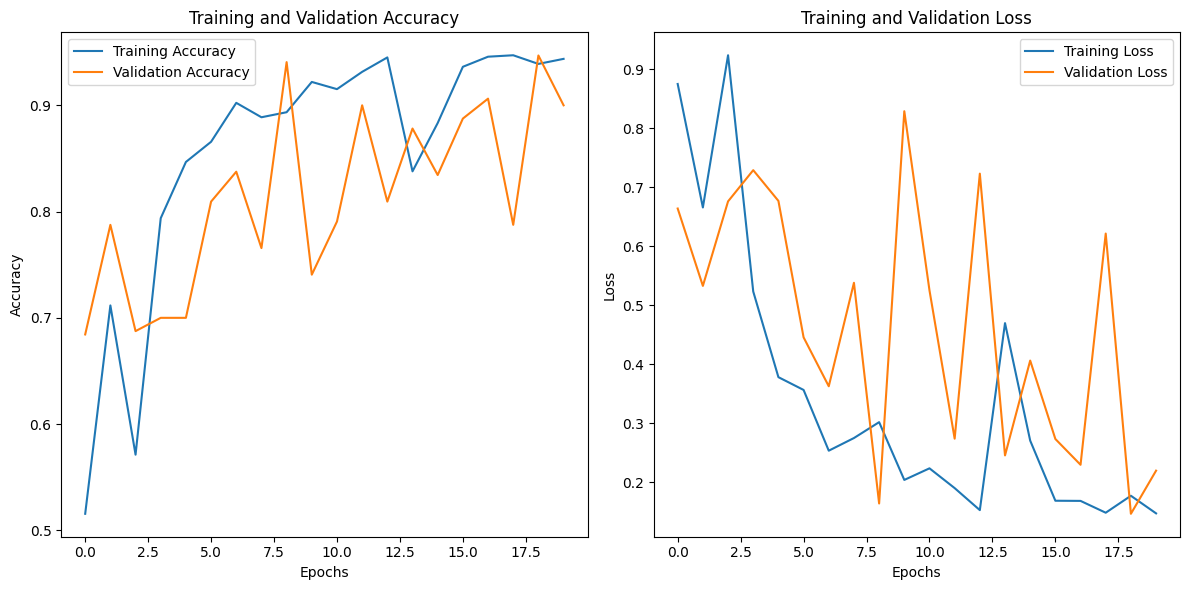

In [90]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [91]:
# save the model
model.save("potato_disease_detection_model.h5")